# Final Project Submission - Siddhant Bhardwaj

This is my final project submission involving the creation of a complete 
ETL pipeline that shall extract data from a csv file, explore it, transform the
file, and load it into an AWS database. Finally there, will also be code to test
out the different tables which will indicate if they have been correctly loaded.

## Data import

For this project, I have used the Hotel Demand Booking dataset available on Kaggle. In this project, I have hosted this csv file in my google drive which is accessed by the link in the pd.read_csv command. The link to the project is available at - https://www.kaggle.com/jessemostipak/hotel-booking-demand and contains all the details about the project. The dataset comes in among the top recommended datasets for practicing data cleaning and preprocessing


In [2]:
import pandas as pd
hotels = pd.read_csv("https://drive.google.com/uc?export=download&id=1Jq1Hh-uLmXoTDwklVnuISYAG4XvcdwjG")

## Data exploration
 
In the next cell, I shall be obtaining the first five rows of the dataset in order to get a basic understanding of the dataset. 


In [ ]:
hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In the next cell, I shall be obtaining the last five rows of the dataset in order to get a basic understanding of the dataset. 


In [ ]:
hotels.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In the next cell, I shall be obtaining all the summary statistics about the dataset using the .describe() function

In [ ]:
hotels.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Obtaining information about nan values, dtypes from the dataset

In [ ]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Obtaining the information about the presence of the null values per column

In [ ]:
hotels.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


Obtaining the information about the sum of all present nan values in the dataset

In [ ]:
hotels.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Since the hotel column is of dtype object, I decided to explore its *contents*

In [ ]:
hotels['hotel'].describe()

count         119390
unique             2
top       City Hotel
freq           79330
Name: hotel, dtype: object

Since the arrival_date_month column is of dtype object, I decided to explore its *contents*

In [ ]:
hotels['arrival_date_month'].describe()

count     119390
unique        12
top       August
freq       13877
Name: arrival_date_month, dtype: object

Since the meal column is of dtype object, I decided to explore its *contents*

In [ ]:
hotels['meal'].describe()

count     119390
unique         5
top           BB
freq       92310
Name: meal, dtype: object

Since the country column is of dtype object, I decided to explore its *contents*

In [ ]:
hotels['country'].describe()

count     118902
unique       177
top          PRT
freq       48590
Name: country, dtype: object

Since the market_segment column is of dtype object, I decided to explore its *contents*

In [ ]:
hotels['market_segment'].describe()

count        119390
unique            8
top       Online TA
freq          56477
Name: market_segment, dtype: object

Since the distribution_channel column is of dtype object, I decided to explore its *contents*

In [ ]:
hotels['distribution_channel'].describe()

count     119390
unique         5
top        TA/TO
freq       97870
Name: distribution_channel, dtype: object

Since the hotel reserved_room_type is of dtype object, I decided to explore its *contents*, so that I could decide later on if I wanted to change its datatype

In [ ]:
hotels['reserved_room_type'].describe()

count     119390
unique        10
top            A
freq       85994
Name: reserved_room_type, dtype: object

Since the hotel assigned_room_type is of dtype object, I decided to explore its contents, so that I could decide later on if I wanted to change its datatype

In [ ]:
hotels['assigned_room_type'].describe()

count     119390
unique        12
top            A
freq       74053
Name: assigned_room_type, dtype: object

Since the column customer_type is of dtype object, I decided to explore its contents, so that I could decide later on if I wanted to change its datatype

In [ ]:
hotels['customer_type'].describe()

count        119390
unique            4
top       Transient
freq          89613
Name: customer_type, dtype: object

Since the column reservation_status is of dtype object, I decided to explore its contents, so that I could decide later on if I wanted to change its datatype

In [ ]:
hotels['reservation_status'].describe()

count        119390
unique            3
top       Check-Out
freq          75166
Name: reservation_status, dtype: object

Since the column reservation_status_date is of dtype object, I decided to explore its contents, so that I could decide later on if I wanted to change its datatype

In [ ]:
hotels['reservation_status_date'].describe()

count         119390
unique           926
top       2015-10-21
freq            1461
Name: reservation_status_date, dtype: object

There are 2 predominant hotels in the dataset

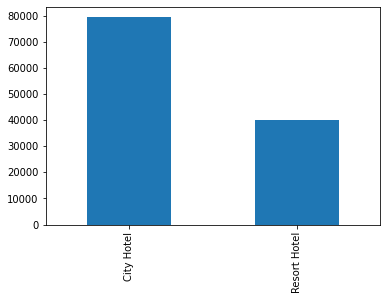

In [ ]:
hotels['hotel'].value_counts().plot.bar()

The deposit_type column has 3 categories - No Deposit, No Refund and Refund

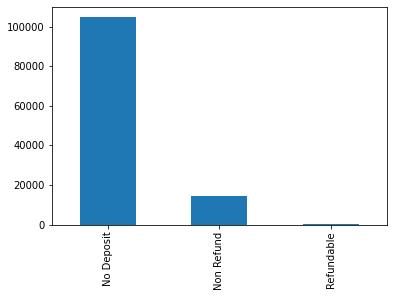

In [ ]:
hotels['deposit_type'].value_counts().plot.bar()

The market segment column has 8 categories

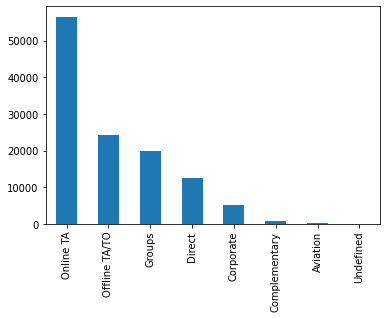

In [ ]:
hotels['market_segment'].value_counts().plot.bar()

There are 5 kinds of distribution channels

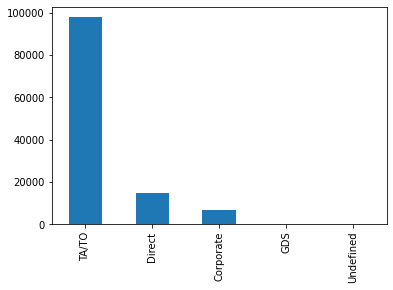

In [ ]:
hotels['distribution_channel'].value_counts().plot.bar()

## Roadmap

Add in text cells that describe what the data are based on your exploration *and* where you want to take the data.  In other words, what is your data endpoint? Also describe the specific steps you need to take in your extractions and transformations to get to that endpoint.

The dataset has a huge number of variables and contains information about multiple aspects of customers who go to restuarants. Such information includes countries they come from, hotels thry go to, meals they order, car_paring_space etc. In keeping with this huge information, I have decided to analyze different aspects of the dataset pertaining to the customer aspect and also the macro-variable such as the countries and the hotels that belong to and visit and convert them into appropriate transforms. In order to get the desired result, I would need to change the datatypes, drop the NaN values and appropriately treat the data.


Create a countries table that would contain information about all the people belonging to a country in the dataset.

Creating a cancelled table that would contain information about hotel bookings depending on their cancellation status such as mean_adults, mean_children,mean_babies,modal_market_segment,modal_country,modal_hotel etc.

Create a hotels table that would contain information about the hotels themselves and the important traits of customers that go to them.

Create a customer_personal_details table that would contain information about the personal details about a customer in a dataset.

Create a customer_check_in table that would contain specific information about the customers who have checked in.

Create a customer requirements table that would tabulate information about their needs as they have placed and their sense of satisfaction about them.

## Transforms
 
This is the transforms section.

I am dropping the column company from the dataset because it has too many NaN values and there is no way it can imputed or rectified without dropping. It contains over 110,000 NaN values which is almost the complete dataset.

In [26]:
hotels.drop(['company'],axis = 1,inplace = True)

I am dropping the remaining NaN values in the remaining columns in the dataset. 

In [27]:
hotels.dropna(inplace = True)

Checking for the presence of NaN values in the dataframe by summing up the presene of NaN values per column.

In [28]:
hotels.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Converting the reservation_status_date column into datetime type from the previous object datatype.

In [29]:
pd.to_datetime(hotels['reservation_status_date'])

3        2015-07-02
4        2015-07-03
5        2015-07-03
7        2015-07-03
8        2015-05-06
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 102894, dtype: datetime64[ns]

Creating the create_arrival_time_column function which would mean that there will be a new column in the dataframe called the arrival_time column which would contain the arrival time by combining the the other 3 arrival columns to create a valid datetime object.

In [30]:
def create_arrival_time_column():
  d = {'January':"01","February":"02","March":"03","April":"04","May":"05","June":"06","July":"07","August":"08",
       "September":"09","October":"10","November":"11","December":"12"}
  lst = []
  for i in range(len(hotels)):
    lst.append(str(hotels.iloc[i,3]) + '-'  + d[hotels.iloc[i,4]] + '-'  + str(hotels.iloc[i,6]))
  hotels['arrival_time'] = lst
  pd.to_datetime(hotels['arrival_time'])

Calling the create_arrival_time_column function.

In [31]:
create_arrival_time_column()

Checking the arrival_time column

In [32]:
hotels['arrival_time']

3          2015-07-1
4          2015-07-1
5          2015-07-1
7          2015-07-1
8          2015-07-1
             ...    
119385    2017-08-30
119386    2017-08-31
119387    2017-08-31
119388    2017-08-31
119389    2017-08-29
Name: arrival_time, Length: 102894, dtype: object

Dropping the columns 'arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month'

In [33]:
hotels.drop(['arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month'],axis = 1,inplace  =True)

Creating the hotel_id column

In [34]:
#Creating hotel id
hotels['hotel_id'] = pd.factorize(hotels['hotel'])[0].astype(str)
hotels

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_time,hotel_id
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-1,0
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-1,0
5,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-1,0
7,Resort Hotel,0,9,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07-1,0
8,Resort Hotel,1,85,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.00,0,1,Canceled,2015-05-06,2015-07-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30,1
119386,City Hotel,0,102,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31,1
119387,City Hotel,0,34,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31,1
119388,City Hotel,0,109,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31,1


Creating the country id column

In [35]:
#Creating country id
hotels['country_id'] = pd.factorize(hotels['country'])[0].astype(str)
hotels

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_time,hotel_id,country_id
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-1,0,0
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-1,0,0
5,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-1,0,0
7,Resort Hotel,0,9,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07-1,0,1
8,Resort Hotel,1,85,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.00,0,1,Canceled,2015-05-06,2015-07-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30,1,12
119386,City Hotel,0,102,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31,1,11
119387,City Hotel,0,34,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31,1,10
119388,City Hotel,0,109,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31,1,0


In [36]:
#Creating country id
hotels['country_id'] = pd.factorize(hotels['country'])[0].astype(str)
hotels

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_time,hotel_id,country_id
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-1,0,0
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-1,0,0
5,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-1,0,0
7,Resort Hotel,0,9,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07-1,0,1
8,Resort Hotel,1,85,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.00,0,1,Canceled,2015-05-06,2015-07-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30,1,12
119386,City Hotel,0,102,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31,1,11
119387,City Hotel,0,34,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31,1,10
119388,City Hotel,0,109,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31,1,0


Checking the columns of the hotels dataset.

In [37]:
hotels.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_time',
       'hotel_id', 'country_id'],
      dtype='object')

Creating the first table to loaded into the AWS database. The hotel table is a table containing information about each hotel in the dataset such as the average lead time, the average stay in weeekend_nights, the average stay in week_nights, the average number of adults, the average number of children,the average number of children, the average number of babies, the mean of number of days in waiting list, the most common customer_type and the hotel+id associated with the hotel.

In [ ]:
#Creating hotels table
hotel = hotels.groupby([hotels['hotel']]).agg({'lead_time':["mean"],'stays_in_weekend_nights':['mean'],'stays_in_week_nights':['mean'],'adults':['mean'],
'children':['mean'],'babies':['mean'],'days_in_waiting_list':['mean']})
hotel = hotel.reset_index()
hotel.columns = ['hotel_name','avg_lead_time','mean_stay_in_weekend_nights','mean_stay_in_week_nights','avg_adults','avg_children','avg_babies','avg_days_in_waiting_list']
hotel.loc[0,'most_common_customer_type'] =  hotels[hotels['hotel'] == 'City Hotel']['customer_type'].mode()[0]
hotel.loc[1,'most_common_customer_type'] = hotels[hotels['hotel'] == 'Resort Hotel']['customer_type'].mode()[0]
hotel.loc[0,'hotel_id'] = hotels[hotels['hotel'] == 'City Hotel']['hotel_id'].mode()[0]
hotel.loc[1,'hotel_id'] = hotels[hotels['hotel'] == 'Resort Hotel']['hotel_id'].mode()[0]
hotel.head()
#hotel table - hotel name,hotel id, mean(lead_time),mean(adult),mean(children),mean(babies),
#mean(stays_in_weekend_nights),mean(stays_in_week_nights),mean(days_in_waiting_list),most_common(customer_type),

,hotel_name,avg_lead_time,mean_stay_in_weekend_nights,mean_stay_in_week_nights,avg_adults,avg_children,avg_babies,avg_days_in_waiting_list,most_common_customer_type,hotel_id
0,City Hotel,116.833116,0.822720,2.233419,1.892247,0.095236,0.004538,3.552170,Transient,1
1,Resort Hotel,100.308612,1.327121,3.389241,1.917163,0.147132,0.014789,0.526346,Transient,0


Creating a countries tables which will also be loaded into the dataframe. This table shall include information about each country in the dataset such as the total number of adults, total number of babies, total number of agents, average lead_time, average of canceled requests, country_id, most_common_market_segment,most_common_deposit_type and most_common _customer_type

In [ ]:
#Creating a country table 
countries = hotels.groupby([hotels['country']]).agg({'adults':["sum"],'children':['sum'],'babies':['sum'],'agent':['sum'],'lead_time':['mean'],'is_canceled':['mean']})
countries = countries.reset_index()
countries.columns = ['country','total_adults','total_children','total_babies','total_agents','avg_lead_time','avg_no_canceled']
for i in range(len(countries)):
  countries.loc[i,'country_id'] = hotels[hotels['country'] == countries.loc[i,'country']]['country_id'].mode()[0]
  countries.loc[i,'modal_market_segment'] = hotels[hotels['country'] == countries.loc[i,'country']]['market_segment'].mode()[0]
  countries.loc[i,'modal_deposit_type'] = hotels[hotels['country'] == countries.loc[i,'country']]['deposit_type'].mode()[0]
  countries.loc[i,'modal_customer_type'] = hotels[hotels['country'] == countries.loc[i,'country']]['customer_type'].mode()[0]
countries.head()
#country table - most common market segment,sum(adults),sum(children),sum(babies),most_common_deposit_type,sum(agent),
#most_common(customer_type),avg(lead_time),avg(is_canceled)

,country,total_adults,total_children,total_babies,total_agents,avg_lead_time,avg_no_canceled,country_id,modal_market_segment,modal_deposit_type,modal_customer_type
0,ABW,5,0.0,0,24.0,126.000000,0.000000,157,Online TA,No Deposit,Transient
1,AGO,422,74.0,1,7098.0,30.041353,0.748120,73,Online TA,No Deposit,Transient
2,AIA,2,2.0,0,8.0,0.000000,0.000000,158,Online TA,No Deposit,Transient
3,ALB,19,0.0,1,808.0,81.100000,0.200000,30,Online TA,No Deposit,Transient
4,AND,15,4.0,0,1228.0,47.000000,0.714286,60,Online TA,No Deposit,Transient


Created an is_canceled table that contains information about the mean number of adults, mean number of children, mean number of agents, mean lead time, mean previous cancellations, mean previous bookings not canceled, modal country, modal hotel, modal market segment by status of cancellation

In [39]:
#Creating an is_canceled table
canceled = hotels.groupby([hotels['is_canceled']]).agg({'adults':["mean"],"children":["mean"],"babies":['mean'],"agent":["mean"],"lead_time":['mean'],'previous_cancellations':['mean'],'previous_bookings_not_canceled':['mean']})
canceled = canceled.reset_index()
canceled.columns = ['is_canceled','mean_number_adults','mean_number_children','mean_number_babies','mean_number_agent','mean_lead_time','mean_previous_cancellations','mean_previous_not_canceled']
canceled.loc[0,'most_common_hotel'] = hotels[hotels['is_canceled'] == 0]['hotel'].mode()[0]
canceled.loc[1,'most_common_hotel'] = hotels[hotels['is_canceled'] == 1]['hotel'].mode()[0]
canceled.loc[0,'market_segment'] = hotels[hotels['is_canceled'] == 0]['market_segment'].mode()[0]
canceled.loc[1,'market_segment'] = hotels[hotels['is_canceled'] == 1]['market_segment'].mode()[0]
canceled.loc[0,'country'] = hotels[hotels['is_canceled'] == 0]['country'].mode()[0]
canceled.loc[1,'country'] = hotels[hotels['is_canceled'] == 1]['country'].mode()[0]
canceled.loc[0,'hotel_id'] = hotels[hotels['is_canceled'] == 0]['hotel_id'].mode()[0]
canceled.loc[1,'hotel_id'] = hotels[hotels['is_canceled'] == 1]['hotel_id'].mode()[0]
canceled.loc[0,'country_id'] = hotels[hotels['is_canceled'] == 0]['country_id'].mode()[0]
canceled.loc[1,'country_id'] = hotels[hotels['is_canceled'] == 1]['country_id'].mode()[0]
canceled.head()

,is_canceled,mean_number_adults,mean_number_children,mean_number_babies,mean_number_agent,mean_lead_time,mean_previous_cancellations,mean_previous_not_canceled,most_common_hotel,market_segment,country,hotel_id,country_id
0,0,1.885371,0.109448,0.010186,93.804011,87.817162,0.005643,0.039214,City Hotel,Online TA,PRT,1,1
1,1,1.922661,0.114016,0.003810,75.207515,149.108613,0.189014,0.001170,City Hotel,Online TA,PRT,1,1


Creating a customer_personal_details dataframe which will be loaded as an SQL table and will involve details for each customer entry in a hotel such as the hotel_name,hotel_id,number_of_adults,number_of_children,number_of_babies,country_id,number_of_agents,condition_if_it_was_canceled,number_of_previous_bookings_not_canceled.

In [ ]:
#Create a table for customer personal details - hotel,agent,company,adults,children,babies,meal,country,is_canceled,previous_cancellations,
#previous_bookings_not_cancelled,
customer_personal_details = hotels[['hotel','hotel_id','country','adults','children','babies','country_id','agent','is_canceled','previous_bookings_not_canceled']]
customer_personal_details

,hotel,hotel_id,country,adults,children,babies,country_id,agent,is_canceled,previous_bookings_not_canceled
3,Resort Hotel,0,GBR,1,0.0,0,0,304.0,0,0
4,Resort Hotel,0,GBR,2,0.0,0,0,240.0,0,0
5,Resort Hotel,0,GBR,2,0.0,0,0,240.0,0,0
7,Resort Hotel,0,PRT,2,0.0,0,1,303.0,0,0
8,Resort Hotel,0,PRT,2,0.0,0,1,240.0,1,0
...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,1,BEL,2,0.0,0,12,394.0,0,0
119386,City Hotel,1,FRA,3,0.0,0,11,9.0,0,0
119387,City Hotel,1,DEU,2,0.0,0,10,9.0,0,0
119388,City Hotel,1,GBR,2,0.0,0,0,89.0,0,0


Create a table for customer check-in details - hotel,stays_in_weekend_nights,
stays_in_week_nights,adults,babies,children,deposit_type associated with it. 

In [ ]:
customers_check_in_details = hotels[['hotel','hotel_id','arrival_time','stays_in_weekend_nights','stays_in_week_nights','adults','babies',
                                     'children','deposit_type']]
customers_check_in_details

,hotel,hotel_id,arrival_time,stays_in_weekend_nights,stays_in_week_nights,adults,babies,children,deposit_type
3,Resort Hotel,0,2015-07-1,0,1,1,0,0.0,No Deposit
4,Resort Hotel,0,2015-07-1,0,2,2,0,0.0,No Deposit
5,Resort Hotel,0,2015-07-1,0,2,2,0,0.0,No Deposit
7,Resort Hotel,0,2015-07-1,0,2,2,0,0.0,No Deposit
8,Resort Hotel,0,2015-07-1,0,3,2,0,0.0,No Deposit
...,...,...,...,...,...,...,...,...,...
119385,City Hotel,1,2017-08-30,2,5,2,0,0.0,No Deposit
119386,City Hotel,1,2017-08-31,2,5,3,0,0.0,No Deposit
119387,City Hotel,1,2017-08-31,2,5,2,0,0.0,No Deposit
119388,City Hotel,1,2017-08-31,2,5,2,0,0.0,No Deposit


Create a table for customer requirements - hotel,required_car_parking_spaces,total_of_special_requests,booking_changes,assigned_room_type


In [ ]:
customers_requirements_table = hotels[['hotel','hotel_id','required_car_parking_spaces','total_of_special_requests','booking_changes',
                                       'reserved_room_type','assigned_room_type']]
customers_requirements_table

,hotel,hotel_id,required_car_parking_spaces,total_of_special_requests,booking_changes,reserved_room_type,assigned_room_type
3,Resort Hotel,0,0,0,0,A,A
4,Resort Hotel,0,0,1,0,A,A
5,Resort Hotel,0,0,1,0,A,A
7,Resort Hotel,0,0,1,0,C,C
8,Resort Hotel,0,0,1,0,A,A
...,...,...,...,...,...,...,...
119385,City Hotel,1,0,0,0,A,A
119386,City Hotel,1,0,2,0,E,E
119387,City Hotel,1,0,4,0,D,D
119388,City Hotel,1,0,0,0,A,A


## Load to database
 
First, set up your database on AWS like we did previously.  Then set up a connection and cursor function with your credentials so you and I can access it.
 
Once that is done build the appropriate tables, prepare your data, and load them into the databases.


Importing psycopg2

In [46]:
import psycopg2

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


Initializing the get_conn_cur() function

In [47]:
def get_conn_cur():
  # UPDATE WITH YOUR INFO!
  conn = psycopg2.connect(
  host="database-4.cvwfo3fm2djf.us-east-1.rds.amazonaws.com",
  database="final_project_db",
  user="postgres",
  password="password",
  port='5432')
  
  cur = conn.cursor()
  return(conn, cur)

Initializing other functions that would be useful in querying information.

In [48]:
def run_query(query_string):

  conn, cur = get_conn_cur() # get connection and cursor

  cur.execute(query_string) # executing string as before

  my_data = cur.fetchall() # fetch query data as before

  # here we're extracting the 0th element for each item in cur.description
  colnames = [desc[0] for desc in cur.description]

  cur.close() # close
  conn.close() # close

  return(colnames, my_data) # return column names AND data

# Column name function for checking out what's in a table
def get_column_names(table_name): # arguement of table_name
  conn, cur = get_conn_cur() # get connection and cursor

  # Now select column names while inserting the table name into the WERE
  column_name_query =  """SELECT column_name FROM information_schema.columns
       WHERE table_name = '%s' """ %table_name

  cur.execute(column_name_query) # exectue
  my_data = cur.fetchall() # store

  cur.close() # close
  conn.close() # close

  return(my_data) # return

# Check table_names
def get_table_names():
  conn, cur = get_conn_cur() # get connection and cursor

  # query to get table names
  table_name_query = """SELECT table_name FROM information_schema.tables
       WHERE table_schema = 'public' """

  cur.execute(table_name_query) # execute
  my_data = cur.fetchall() # fetch results

  cur.close() #close cursor
  conn.close() # close connection

  return(my_data) # return your fetched results
  
# make sql_head function
def sql_head(table_name):
  conn, cur = get_conn_cur() # get connection and cursor

  # Now select column names while inserting the table name into the WERE
  head_query =  """SELECT * FROM %s LIMIT 5; """ %table_name

  cur.execute(head_query) # exectue
  colnames = [desc[0] for desc in cur.description] # get column names
  my_data = cur.fetchall() # store first five rows

  cur.close() # close
  conn.close() # close

  df = pd.DataFrame(data = my_data, columns = colnames) # make into df

  return(df) # return

Creating an sql squery to create a table hotel with hotel_id,hotel name,avg_lead_time,avg_amount_adult,avg_amount_children,avg_amount_babies,avg_days_in_waiting_list,and most_common_customer_type as the columns

In [ ]:
tq = """CREATE TABLE hotel (
          hotel_id INTEGER PRIMARY KEY,
          hotel VARCHAR(200) NOT NULL , 
          avg_lead_time INTEGER NOT NULL,
          avg_amount_adult INTEGER NOT NULL,
          avg_amount_children INTEGER NOT NULL,
          avg_amount_babies INTEGER NOT NULL,
          avg_stay_weekend_nights INTEGER NOT NULL,
          avg_stay_in_week_nights INTEGER NOT NULL,
          avg_days_waiting_list INTEGER NOT NULL,
          most_common_customer_type VARCHAR(300) NOT NULL
          );"""

Getting the connection and the cursor

In [ ]:
conn, cur = get_conn_cur()

Executing the query

In [ ]:
cur.execute(tq)

Commiting the query

In [ ]:
conn.commit()

Getting the table_names

In [ ]:
get_table_names()

[('hotel',)]

Getting column names of the hotel table

In [ ]:
get_column_names(table_name='hotel')

[('hotel_id',),
 ('hotel',),
 ('avg_lead_time',),
 ('avg_amount_adult',),
 ('avg_amount_children',),
 ('avg_amount_babies',),
 ('avg_stay_weekend_nights',),
 ('avg_stay_in_week_nights',),
 ('avg_days_waiting_list',),
 ('most_common_customer_type',)]

Getting the data stored in the hotel dataset in the form of a list of tuples using the numpylibrary

In [ ]:
import numpy as np
data_tups = [tuple(data) for data in hotel.to_numpy()]

Creating the insert query in sql

In [ ]:
insert_query = """ INSERT INTO hotel(hotel,avg_lead_time,avg_amount_adult,avg_amount_children,avg_amount_babies,
                    avg_stay_weekend_nights,avg_stay_in_week_nights,avg_days_waiting_list,most_common_customer_type,hotel_id) 
                    VALUES(%s, %s, %s, %s, %s,%s,%s,%s,%s,%s); """ 

Getting the connection and the cursor

In [ ]:
conn, cur = get_conn_cur()
cur.executemany(insert_query, data_tups)
conn.commit()

Checking the table hotel to see if it is correct.

In [ ]:
# Use sql_head to check cases
sql_head(table_name='hotel')

,hotel_id,hotel,avg_lead_time,avg_amount_adult,avg_amount_children,avg_amount_babies,avg_stay_weekend_nights,avg_stay_in_week_nights,avg_days_waiting_list,most_common_customer_type
0,1,City Hotel,117,1,2,2,0,0,4,Transient
1,0,Resort Hotel,100,1,3,2,0,0,1,Transient


Created an is_canceled table that contains information about the mean number of adults, mean number of children, mean number of agents, mean lead time, mean previous cancellations, mean previous bookings not canceled, modal country, modal hotel, modal market segment by status of cancellation

In [70]:
tq1 = """CREATE TABLE cancelled (
          is_canceled INTEGER NOT NULL,
          mean_number_adults INTEGER NOT NULL,
          mean_number_children INTEGER NOT NULL,
          mean_number_babies INTEGER NOT NULL,
          mean_number_agent INTEGER NOT NULL,
          mean_lead_time INTEGER NOT NULL,
          mean_previous_cancellations INTEGER NOT NULL,
          mean_previous_not_canceled INTEGER NOT NULL,
          most_common_hotel VARCHAR(100) NOT NULL,
          most_common_market_segment VARCHAR(100) NOT NULL,
          country VARCHAR(100) NOT NULL,
          hotel_id VARCHAR(100) NOT NULL,
          country_id VARCHAR(100) NOT NULL
          );"""

Creating a connection and cursor

In [71]:
conn, cur = get_conn_cur()

Executing cursor

In [72]:
cur.execute(tq1)

Commiting query

In [73]:
conn.commit()

Checking the column names

In [74]:
get_column_names(table_name='cancelled')

[('is_canceled',),
 ('mean_number_adults',),
 ('mean_number_children',),
 ('mean_number_babies',),
 ('mean_number_agent',),
 ('mean_lead_time',),
 ('mean_previous_cancellations',),
 ('mean_previous_not_canceled',),
 ('most_common_hotel',),
 ('most_common_market_segment',),
 ('country',),
 ('hotel_id',),
 ('country_id',)]

Obtained information in the form of list of tuples

In [75]:
import numpy as np
data_tups_i = [tuple(data) for data in canceled.to_numpy()]
data_tups_i

[(0,
  1.8853713356606572,
  0.10944797793824622,
  0.010186026493233226,
  93.80401064830312,
  87.81716162147514,
  0.0056429630338099565,
  0.03921381091291665,
  'City Hotel',
  'Online TA',
  'PRT',
  '1',
  '1'),
 (1,
  1.922661288314534,
  0.11401608525684122,
  0.0038096660939717637,
  75.2075147531187,
  149.10861283334577,
  0.1890142177734618,
  0.0011702895844226987,
  'City Hotel',
  'Online TA',
  'PRT',
  '1',
  '1')]

Insertion query to insert information into table 

In [84]:
insert_query = """ INSERT INTO cancelled(is_canceled,mean_number_adults,mean_number_children,mean_number_babies,mean_number_agent,mean_lead_time,
                    mean_previous_cancellations,mean_previous_not_canceled,most_common_hotel,most_common_market_segment,country,hotel_id,country_id) 
                    VALUES(%s, %s, %s, %s, %s,%s,%s,%s,%s,%s,%s,%s,%s);  """ 

Obtained connection and cursor, inserting information and commiting changes

In [85]:
conn, cur = get_conn_cur()
cur.executemany(insert_query, data_tups_i)
conn.commit()

Checking if information has been correctly inserted into cancelled table

In [86]:
# Use sql_head to check cases
sql_head(table_name='cancelled')

,is_canceled,mean_number_adults,mean_number_children,mean_number_babies,mean_number_agent,mean_lead_time,mean_previous_cancellations,mean_previous_not_canceled,most_common_hotel,most_common_market_segment,country,hotel_id,country_id
0,0,2,0,0,94,88,0,0,City Hotel,Online TA,PRT,1,1
1,1,2,0,0,75,149,0,0,City Hotel,Online TA,PRT,1,1


Creating the sql query to create the countries Table with country,total_adults,total_children,total_babies,total_agents,avg_lead_time,avg_no_canceled,country_id,modal_market_segment,modal_deposit_type,modal_customer_type columns

In [ ]:
new_q = """CREATE TABLE countries (
          country VARCHAR(200) NOT NULL,
          total_adults INTEGER NOT NULL,
          total_children INTEGER NOT NULL,
          total_babies INTEGER NOT NULL,
          total_agents INTEGER NOT NULL,
          avg_lead_time INTEGER NOT NULL,
          avg_no_canceled INTEGER NOT NULL,
          country_id INTEGER PRIMARY KEY,
          modal_market_segment VARCHAR(200) NOT NULL,
          modal_deposit_type VARCHAR(200) NOT NULL,
          modal_customer_type VARCHAR(200) NOT NULL
          );"""
          

Executing the query

In [ ]:
cur.execute(new_q)

Commiting the query

In [ ]:
conn.commit()

Got the table names in the db

In [ ]:
get_table_names()

[('hotel',), ('countries',)]

Got the column names for the countries table to check it.

In [ ]:
get_column_names(table_name="countries")

[('country',),
 ('total_adults',),
 ('total_children',),
 ('total_babies',),
 ('total_agents',),
 ('avg_lead_time',),
 ('avg_no_canceled',),
 ('country_id',),
 ('modal_market_segment',),
 ('modal_deposit_type',),
 ('modal_customer_type',)]

Got the data from the countries dataframe in the form of a list of tuples using the numpy library

In [ ]:
data_tups1 = [tuple(data) for data in countries.to_numpy()]

Created the query to insert the data into the countries table in the database

In [ ]:
insert_query1 = """ INSERT INTO countries(country,total_adults,total_children,total_babies,total_agents,avg_lead_time,avg_no_canceled,country_id,modal_market_segment,modal_deposit_type,modal_customer_type) VALUES(%s, %s, %s, %s, %s,%s,%s,%s,%s,%s,%s); """ 

Got the connection and the cursor,inserted the data into the database and committed the changes.

In [ ]:
conn, cur = get_conn_cur()
cur.executemany(insert_query1, data_tups1)
conn.commit()

Checked if the data was properly inserted.

In [ ]:
sql_head(table_name='countries')

,country,total_adults,total_children,total_babies,total_agents,avg_lead_time,avg_no_canceled,country_id,modal_market_segment,modal_deposit_type,modal_customer_type
0,ABW,5,0,0,24,126,0,157,Online TA,No Deposit,Transient
1,AGO,422,74,1,7098,30,1,73,Online TA,No Deposit,Transient
2,AIA,2,2,0,8,0,0,158,Online TA,No Deposit,Transient
3,ALB,19,0,1,808,81,0,30,Online TA,No Deposit,Transient
4,AND,15,4,0,1228,47,1,60,Online TA,No Deposit,Transient


Created a query to create a customer_personal_details table with hotel,hotel_id,country,adults,children,babies,country_id,is_canceled,previous_bookings_not_canceled column

In [ ]:
new_q_1 = """CREATE TABLE customer_personal_details (
          hotel VARCHAR(200) NOT NULL,
          hotel_id VARCHAR(100) NOT NULL,
          country VARCHAR(200) NOT NULL,
          adults INTEGER NOT NULL,
          children INTEGER NOT NULL,
          babies INTEGER NOT NULL,
          country_id VARCHAR(50) NOT NULL,
          agent INTEGER NOT NULL,
          is_canceled INTEGER NOT NULL,
          previous_bookings_not_canceled INTEGER NOT NULL
          );"""

Executing the query

In [ ]:
cur.execute(new_q_1)

Commiting the query

In [ ]:
conn.commit()

Got the column names for the table customer_personal_details

In [ ]:
get_column_names(table_name = "customer_personal_details")

[('hotel',),
 ('hotel_id',),
 ('country',),
 ('adults',),
 ('children',),
 ('babies',),
 ('country_id',),
 ('agent',),
 ('is_canceled',),
 ('previous_bookings_not_canceled',)]

Created a query to insert the information into the table.

In [ ]:
insert_query2 = """ INSERT INTO customer_personal_details(hotel,hotel_id,country,adults,children,babies,country_id,agent,is_canceled,
previous_bookings_not_canceled) VALUES(%s, %s, %s, %s, %s,%s,%s,%s,%s,%s); """ 

Obtained the information in the customer_personal_details df and converted it into a list of tuples.

In [ ]:
data_tups2 = [tuple(data) for data in customer_personal_details.to_numpy()][1:10000]
data_tups2

[('Resort Hotel', '0', 'GBR', 2, 0.0, 0, '0', 240.0, 0, 0),
 ('Resort Hotel', '0', 'GBR', 2, 0.0, 0, '0', 240.0, 0, 0),
 ('Resort Hotel', '0', 'PRT', 2, 0.0, 0, '1', 303.0, 0, 0),
 ('Resort Hotel', '0', 'PRT', 2, 0.0, 0, '1', 240.0, 1, 0),
 ('Resort Hotel', '0', 'PRT', 2, 0.0, 0, '1', 15.0, 1, 0),
 ('Resort Hotel', '0', 'PRT', 2, 0.0, 0, '1', 240.0, 1, 0),
 ('Resort Hotel', '0', 'PRT', 2, 0.0, 0, '1', 240.0, 0, 0),
 ('Resort Hotel', '0', 'USA', 2, 0.0, 0, '2', 240.0, 0, 0),
 ('Resort Hotel', '0', 'ESP', 2, 1.0, 0, '3', 241.0, 0, 0),
 ('Resort Hotel', '0', 'PRT', 2, 0.0, 0, '1', 241.0, 0, 0),
 ('Resort Hotel', '0', 'IRL', 2, 0.0, 0, '4', 240.0, 0, 0),
 ('Resort Hotel', '0', 'PRT', 2, 0.0, 0, '1', 8.0, 0, 0),
 ('Resort Hotel', '0', 'IRL', 2, 0.0, 0, '4', 240.0, 0, 0),
 ('Resort Hotel', '0', 'GBR', 2, 0.0, 0, '0', 250.0, 0, 0),
 ('Resort Hotel', '0', 'GBR', 1, 0.0, 0, '0', 241.0, 0, 0),
 ('Resort Hotel', '0', 'PRT', 2, 0.0, 0, '1', 250.0, 0, 0),
 ('Resort Hotel', '0', 'PRT', 2, 0.0, 0, '1

Got the connection and cursor, inserted the information into the table and committed the changes.

In [ ]:
conn, cur = get_conn_cur()
cur.executemany(insert_query2, data_tups2)
conn.commit()

Checked the customer_personal_details table in the dataframe.

In [ ]:
sql_head(table_name='customer_personal_details')

,hotel,hotel_id,country,adults,children,babies,country_id,agent,is_canceled,previous_bookings_not_canceled
0,Resort Hotel,0,GBR,2,0,0,0,240,0,0
1,Resort Hotel,0,GBR,2,0,0,0,240,0,0
2,Resort Hotel,0,PRT,2,0,0,1,303,0,0
3,Resort Hotel,0,PRT,2,0,0,1,240,1,0
4,Resort Hotel,0,PRT,2,0,0,1,15,1,0


Created a table customer_check_in_detail that would contain information about the hotel name, hotel_id,arrival_time,stays_in_weekend_nughts,stay_in_week_nights,adults,babies,children and deposit_type

In [ ]:
new_q_2 = """CREATE TABLE customer_check_in_detail (
          hotel VARCHAR(200) NOT NULL,
          hotel_id VARCHAR(100) NOT NULL,
          arrival_time DATE NOT NULL,
          stays_in_weekend_nights INTEGER NOT NULL,
          stay_in_week_nights INTEGER NOT NULL,
          adults INTEGER NOT NULL,
          babies INTEGER NOT NULL,
          children INTEGER NOT NULL,
          deposit_type VARCHAR(100) NOT NULL
          );"""

Executed the query

In [ ]:
cur.execute(new_q_2)

Committed the query.

In [ ]:
conn.commit()

Got the column names of the table customer_check_in_detail

In [ ]:
get_column_names(table_name = "customer_check_in_detail")

[('hotel',),
 ('hotel_id',),
 ('arrival_time',),
 ('stays_in_weekend_nights',),
 ('stay_in_week_nights',),
 ('adults',),
 ('babies',),
 ('children',),
 ('deposit_type',)]

Created a query to insert the data into the table.

In [ ]:
insert_query3 = """ INSERT INTO customer_check_in_detail(hotel,hotel_id,arrival_time,stays_in_weekend_nights,
                stay_in_week_nights,adults,babies,children,deposit_type) VALUES(%s, %s, %s, %s, %s,%s,%s,%s,%s); """ 

Obtained information from the dataframe in the form of a list of tuples with the help of the numpy library

In [ ]:
data_tups3 = [tuple(data) for data in customers_check_in_details.to_numpy()][1:10000]
data_tups3
#customers_check_in_details = hotels[['hotel','hotel_id','arrival_time','stays_in_weekend_nights','stays_in_week_nights','adults','babies',
#                                     'children','deposit_type']]

[('Resort Hotel', '0', '2015-07-1', 0, 2, 2, 0, 0.0, 'No Deposit'),
 ('Resort Hotel', '0', '2015-07-1', 0, 2, 2, 0, 0.0, 'No Deposit'),
 ('Resort Hotel', '0', '2015-07-1', 0, 2, 2, 0, 0.0, 'No Deposit'),
 ('Resort Hotel', '0', '2015-07-1', 0, 3, 2, 0, 0.0, 'No Deposit'),
 ('Resort Hotel', '0', '2015-07-1', 0, 3, 2, 0, 0.0, 'No Deposit'),
 ('Resort Hotel', '0', '2015-07-1', 0, 4, 2, 0, 0.0, 'No Deposit'),
 ('Resort Hotel', '0', '2015-07-1', 0, 4, 2, 0, 0.0, 'No Deposit'),
 ('Resort Hotel', '0', '2015-07-1', 0, 4, 2, 0, 0.0, 'No Deposit'),
 ('Resort Hotel', '0', '2015-07-1', 0, 4, 2, 0, 1.0, 'No Deposit'),
 ('Resort Hotel', '0', '2015-07-1', 0, 4, 2, 0, 0.0, 'No Deposit'),
 ('Resort Hotel', '0', '2015-07-1', 0, 4, 2, 0, 0.0, 'No Deposit'),
 ('Resort Hotel', '0', '2015-07-1', 0, 4, 2, 0, 0.0, 'No Deposit'),
 ('Resort Hotel', '0', '2015-07-1', 0, 1, 2, 0, 0.0, 'No Deposit'),
 ('Resort Hotel', '0', '2015-07-1', 0, 4, 2, 0, 0.0, 'No Deposit'),
 ('Resort Hotel', '0', '2015-07-1', 1, 4, 1, 0, 

Created the connection and the cursor, inserted the data and committed the changes.

In [ ]:
conn, cur = get_conn_cur()
cur.executemany(insert_query3, data_tups3)
conn.commit()

Checked if the data had been inserted into the database.

In [ ]:
sql_head(table_name = "customer_check_in_detail")

,hotel,hotel_id,arrival_time,stays_in_weekend_nights,stay_in_week_nights,adults,babies,children,deposit_type
0,Resort Hotel,0,2015-07-01,0,2,2,0,0,No Deposit
1,Resort Hotel,0,2015-07-01,0,2,2,0,0,No Deposit
2,Resort Hotel,0,2015-07-01,0,2,2,0,0,No Deposit
3,Resort Hotel,0,2015-07-01,0,3,2,0,0,No Deposit
4,Resort Hotel,0,2015-07-01,0,3,2,0,0,No Deposit


Created a new query to create a new table customer_requirements_table with the columns hotel name,hotel_id,required_car_parking_spaces,total_of_special_requests,booking_changes,reserved_room_type, assigned_room_type.

In [ ]:
new_q_2 = """CREATE TABLE customer_requirements_table (
          hotel VARCHAR(200) NOT NULL,
          hotel_id VARCHAR(100) NOT NULL,
          required_car_parking_spaces INTEGER NOT NULL,
          total_of_special_requests INTEGER NOT NULL,
          booking_changes INTEGER NOT NULL,
          reserved_room_type VARCHAR(100) NOT NULL,
          assigned_room_type VARCHAR(100) NOT NULL
          );"""
#customers_requirements_table = hotels[['hotel','hotel_id','required_car_parking_spaces','total_of_special_requests','booking_changes'
#'reserved_room_type','assigned_room_type']]

Executed the query

In [ ]:
cur.execute(new_q_2)

Committed the query.

In [ ]:
conn.commit()

Got the column names of the table customer_requirements_table

In [ ]:
get_column_names(table_name = "customer_requirements_table")

[('hotel',),
 ('hotel_id',),
 ('required_car_parking_spaces',),
 ('total_of_special_requests',),
 ('booking_changes',),
 ('reserved_room_type',),
 ('assigned_room_type',)]

Created a query statement to create a customer_requirements_table with columns hotel name,hotel_id,required_car_parking_spaces,total_of_special_requests,booking_changes,reserved_room_type,assigned_room_type

In [ ]:
insert_query4 = """ INSERT INTO customer_requirements_table(hotel,hotel_id,required_car_parking_spaces,total_of_special_requests,
                                                          booking_changes,reserved_room_type,assigned_room_type) VALUES(%s, %s, %s, %s, %s,%s,%s); """ 

Obtained information fromthe customer_requirements_table df in the form of a list of tuples

In [ ]:
data_tups4 = [tuple(data) for data in customers_requirements_table.to_numpy()][1:10000]
data_tups4

[('Resort Hotel', '0', 0, 1, 0, 'A', 'A'),
 ('Resort Hotel', '0', 0, 1, 0, 'A', 'A'),
 ('Resort Hotel', '0', 0, 1, 0, 'C', 'C'),
 ('Resort Hotel', '0', 0, 1, 0, 'A', 'A'),
 ('Resort Hotel', '0', 0, 0, 0, 'D', 'D'),
 ('Resort Hotel', '0', 0, 0, 0, 'E', 'E'),
 ('Resort Hotel', '0', 0, 0, 0, 'D', 'D'),
 ('Resort Hotel', '0', 0, 3, 0, 'D', 'E'),
 ('Resort Hotel', '0', 0, 1, 1, 'G', 'G'),
 ('Resort Hotel', '0', 0, 0, 0, 'E', 'E'),
 ('Resort Hotel', '0', 0, 3, 0, 'D', 'E'),
 ('Resort Hotel', '0', 0, 0, 0, 'E', 'E'),
 ('Resort Hotel', '0', 0, 0, 0, 'A', 'E'),
 ('Resort Hotel', '0', 0, 1, 0, 'G', 'G'),
 ('Resort Hotel', '0', 0, 1, 0, 'F', 'F'),
 ('Resort Hotel', '0', 0, 1, 1, 'A', 'A'),
 ('Resort Hotel', '0', 0, 1, 1, 'A', 'A'),
 ('Resort Hotel', '0', 0, 1, 1, 'D', 'D'),
 ('Resort Hotel', '0', 0, 1, 0, 'D', 'I'),
 ('Resort Hotel', '0', 1, 0, 0, 'D', 'D'),
 ('Resort Hotel', '0', 0, 0, 0, 'D', 'D'),
 ('Resort Hotel', '0', 0, 2, 0, 'E', 'E'),
 ('Resort Hotel', '0', 0, 0, 0, 'A', 'A'),
 ('Resort H

Got the connection and the cursor, executes the query and commits the changes.

In [ ]:
conn, cur = get_conn_cur()
cur.executemany(insert_query4, data_tups4)
conn.commit()

Checked the customer_requirements_table

In [ ]:
sql_head(table_name="customer_requirements_table")

,hotel,hotel_id,required_car_parking_spaces,total_of_special_requests,booking_changes,reserved_room_type,assigned_room_type
0,Resort Hotel,0,0,1,0,A,A
1,Resort Hotel,0,0,1,0,A,A
2,Resort Hotel,0,0,1,0,C,C
3,Resort Hotel,0,0,1,0,A,A
4,Resort Hotel,0,0,0,0,D,D


## Check
 
Perform some SQL check to validate that your data is in the database.  Do a basic select and filter, or a simple join, for example. 

Obtaining all rows from customer_personal_details where hotel = 'Resort Hotel'

In [ ]:
run_query(""" SELECT  * FROM customer_personal_details WHERE hotel = 'Resort Hotel' LIMIT 10 """)

(['hotel',
  'hotel_id',
  'country',
  'adults',
  'children',
  'babies',
  'country_id',
  'agent',
  'is_canceled',
  'previous_bookings_not_canceled'],
 [('Resort Hotel', '0', 'GBR', 2, 0, 0, '0', 240, 0, 0),
  ('Resort Hotel', '0', 'GBR', 2, 0, 0, '0', 240, 0, 0),
  ('Resort Hotel', '0', 'PRT', 2, 0, 0, '1', 303, 0, 0),
  ('Resort Hotel', '0', 'PRT', 2, 0, 0, '1', 240, 1, 0),
  ('Resort Hotel', '0', 'PRT', 2, 0, 0, '1', 15, 1, 0),
  ('Resort Hotel', '0', 'PRT', 2, 0, 0, '1', 240, 1, 0),
  ('Resort Hotel', '0', 'PRT', 2, 0, 0, '1', 240, 0, 0),
  ('Resort Hotel', '0', 'USA', 2, 0, 0, '2', 240, 0, 0),
  ('Resort Hotel', '0', 'ESP', 2, 1, 0, '3', 241, 0, 0),
  ('Resort Hotel', '0', 'PRT', 2, 0, 0, '1', 241, 0, 0)])

Obtaining all the rows from the customer_requirements_table where hotel = 'Resort Hotel'

In [ ]:
run_query(""" SELECT  * FROM customer_requirements_table WHERE hotel = 'Resort Hotel' LIMIT 10 """)

(['hotel',
  'hotel_id',
  'required_car_parking_spaces',
  'total_of_special_requests',
  'booking_changes',
  'reserved_room_type',
  'assigned_room_type'],
 [('Resort Hotel', '0', 0, 1, 0, 'A', 'A'),
  ('Resort Hotel', '0', 0, 1, 0, 'A', 'A'),
  ('Resort Hotel', '0', 0, 1, 0, 'C', 'C'),
  ('Resort Hotel', '0', 0, 1, 0, 'A', 'A'),
  ('Resort Hotel', '0', 0, 0, 0, 'D', 'D'),
  ('Resort Hotel', '0', 0, 0, 0, 'E', 'E'),
  ('Resort Hotel', '0', 0, 0, 0, 'D', 'D'),
  ('Resort Hotel', '0', 0, 3, 0, 'D', 'E'),
  ('Resort Hotel', '0', 0, 1, 1, 'G', 'G'),
  ('Resort Hotel', '0', 0, 0, 0, 'E', 'E')])

Obtains all the first 5 rows from customer_check_in_detail where hotel = 'Resort Hotel'

In [ ]:
run_query(""" SELECT * FROM customer_check_in_detail WHERE hotel = 'Resort Hotel' LIMIT 5 """)

(['hotel',
  'hotel_id',
  'arrival_time',
  'stays_in_weekend_nights',
  'stay_in_week_nights',
  'adults',
  'babies',
  'children',
  'deposit_type'],
 [('Resort Hotel',
   '0',
   datetime.date(2015, 7, 1),
   0,
   2,
   2,
   0,
   0,
   'No Deposit'),
  ('Resort Hotel',
   '0',
   datetime.date(2015, 7, 1),
   0,
   2,
   2,
   0,
   0,
   'No Deposit'),
  ('Resort Hotel',
   '0',
   datetime.date(2015, 7, 1),
   0,
   2,
   2,
   0,
   0,
   'No Deposit'),
  ('Resort Hotel',
   '0',
   datetime.date(2015, 7, 1),
   0,
   3,
   2,
   0,
   0,
   'No Deposit'),
  ('Resort Hotel',
   '0',
   datetime.date(2015, 7, 1),
   0,
   3,
   2,
   0,
   0,
   'No Deposit')])

Query to get all rows from countries table

In [ ]:
run_query(""" SELECT * FROM countries """)

(['country',
  'total_adults',
  'total_children',
  'total_babies',
  'total_agents',
  'avg_lead_time',
  'avg_no_canceled',
  'country_id',
  'modal_market_segment',
  'modal_deposit_type',
  'modal_customer_type'],
 [('ABW', 5, 0, 0, 24, 126, 0, 157, 'Online TA', 'No Deposit', 'Transient'),
  ('AGO', 422, 74, 1, 7098, 30, 1, 73, 'Online TA', 'No Deposit', 'Transient'),
  ('AIA', 2, 2, 0, 8, 0, 0, 158, 'Online TA', 'No Deposit', 'Transient'),
  ('ALB', 19, 0, 1, 808, 81, 0, 30, 'Online TA', 'No Deposit', 'Transient'),
  ('AND', 15, 4, 0, 1228, 47, 1, 60, 'Online TA', 'No Deposit', 'Transient'),
  ('ARE', 90, 20, 0, 2761, 50, 1, 52, 'Online TA', 'No Deposit', 'Transient'),
  ('ARG', 370, 30, 1, 14763, 73, 0, 8, 'Online TA', 'No Deposit', 'Transient'),
  ('ARM', 15, 3, 0, 240, 57, 0, 89, 'Online TA', 'No Deposit', 'Transient'),
  ('ASM', 2, 0, 0, 7, 89, 0, 166, 'Online TA', 'No Deposit', 'Transient'),
  ('ATA', 2, 0, 0, 23, 21, 0, 164, 'Direct', 'No Deposit', 'Transient'),
  ('ATF', 2

Runs a query to get all rows of the column most_customer_type from hotel table where hotel_id = 0

In [ ]:
run_query(""" SELECT  most_common_customer_type FROM hotel WHERE hotel_id = '0' """)

(['most_common_customer_type'], [('Transient',)])

Runs a query to get all rows of the column modal market segment from the countries whee total_agents < 100

In [ ]:
run_query(""" SELECT modal_market_segment FROM countries WHERE total_agents < 100 """)

(['modal_market_segment'],
 [('Online TA',),
  ('Online TA',),
  ('Online TA',),
  ('Direct',),
  ('Online TA',),
  ('Online TA',),
  ('Online TA',),
  ('Offline TA/TO',),
  ('Online TA',),
  ('Online TA',),
  ('Online TA',),
  ('Online TA',),
  ('Online TA',),
  ('Online TA',),
  ('Online TA',),
  ('Online TA',),
  ('Online TA',),
  ('Online TA',),
  ('Online TA',),
  ('Groups',),
  ('Online TA',),
  ('Offline TA/TO',),
  ('Online TA',),
  ('Online TA',),
  ('Online TA',),
  ('Online TA',),
  ('Online TA',),
  ('Online TA',),
  ('Online TA',),
  ('Online TA',),
  ('Online TA',),
  ('Online TA',),
  ('Online TA',),
  ('Offline TA/TO',),
  ('Online TA',),
  ('Online TA',),
  ('Online TA',),
  ('Online TA',),
  ('Online TA',),
  ('Online TA',)])

#The End